In [106]:
# imports for ev vehicle data from iea.org

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


In [107]:
# read in csv data file and grab all EV sales rows
ev_df = pd.read_csv("Resources/IEA Global EV Data 2024.csv")
ev_df.head()


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [142]:
# grab slow chargers for regions
ev_charging_slow = ev_df[(ev_df['parameter'] == 'EV charging points') & (ev_df['powertrain'] == 'Publicly available slow') & (ev_df['category'] == 'Historical')]
ev_charging_slow.head()

,region,category,parameter,mode,powertrain,year,unit,value
39,Australia,Historical,EV charging points,EV,Publicly available slow,2017,charging points,440.0
45,Australia,Historical,EV charging points,EV,Publicly available slow,2018,charging points,670.0
54,Australia,Historical,EV charging points,EV,Publicly available slow,2019,charging points,1700.0
59,Australia,Historical,EV charging points,EV,Publicly available slow,2020,charging points,2300.0
70,Australia,Historical,EV charging points,EV,Publicly available slow,2021,charging points,2000.0


In [143]:
# grab fast chargers for regions
ev_charging_fast = ev_df[(ev_df['parameter'] == 'EV charging points') & (ev_df['powertrain'] == 'Publicly available fast') & (ev_df['category'] == 'Historical')]
ev_charging_fast.head()

,region,category,parameter,mode,powertrain,year,unit,value
38,Australia,Historical,EV charging points,EV,Publicly available fast,2017,charging points,40.0
44,Australia,Historical,EV charging points,EV,Publicly available fast,2018,charging points,61.0
69,Australia,Historical,EV charging points,EV,Publicly available fast,2021,charging points,320.0
82,Australia,Historical,EV charging points,EV,Publicly available fast,2022,charging points,470.0
84,Australia,Historical,EV charging points,EV,Publicly available fast,2023,charging points,660.0


In [144]:
ev_charging_total = ev_df[(ev_df['parameter'] == 'EV charging points') & (ev_df['category'] == 'Historical')]
ev_charging_total.head()

,region,category,parameter,mode,powertrain,year,unit,value
38,Australia,Historical,EV charging points,EV,Publicly available fast,2017,charging points,40.0
39,Australia,Historical,EV charging points,EV,Publicly available slow,2017,charging points,440.0
44,Australia,Historical,EV charging points,EV,Publicly available fast,2018,charging points,61.0
45,Australia,Historical,EV charging points,EV,Publicly available slow,2018,charging points,670.0
54,Australia,Historical,EV charging points,EV,Publicly available slow,2019,charging points,1700.0


In [145]:
# get ev sales numbers from historical data
ev_sales_df = ev_df[(ev_df['parameter'] == 'EV sales') & (ev_df['category'] == 'Historical') & (ev_df['mode'] == 'Cars')]
ev_sales_df.head()

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.0
10,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100.0
14,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190.0


In [146]:
# get ev sales percentage number from historical data
ev_sales_per_df = ev_df[(ev_df['parameter'] == 'EV sales share') & (ev_df['category'] == 'Historical') & (ev_df['mode'] == 'Cars')]
ev_sales_per_df

,region,category,parameter,mode,powertrain,year,unit,value
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.0065
6,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.0300
13,Australia,Historical,EV sales share,Cars,EV,2013,percent,0.0340
18,Australia,Historical,EV sales share,Cars,EV,2014,percent,0.1600
25,Australia,Historical,EV sales share,Cars,EV,2015,percent,0.2000
...,...,...,...,...,...,...,...,...
11824,World,Historical,EV sales share,Cars,EV,2019,percent,2.6000
11827,World,Historical,EV sales share,Cars,EV,2020,percent,4.2000
12100,World,Historical,EV sales share,Cars,EV,2021,percent,8.9000
12103,World,Historical,EV sales share,Cars,EV,2022,percent,14.0000


In [147]:
def create_year_region_sum_df(df):
# create initialized dataframe to hold 2010 data for easy merge of the dataframes.
# create a list to hold the rest of the years of data to store in dataframes.
    years =[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
    # prime dataframe for easy merging
    df_year_final = pd.DataFrame(df[df['year'] == 2010])
    # group dataframe by region and sum total number of EV's sold
    df_year_final = pd.DataFrame(df_year_final.groupby('region')['value'].sum())
    # rename column value to the year for that data set for plotting/analysis by year
    df_year_final.rename(columns={'value':f"{2010}"},inplace=True)


# create data frames for every year of EV vehicle data, 2011 - 2023 and then merge
# them into a single dataframe to return
    for year in years:
        df_year = df[df['year'] == year]
        df_year = pd.DataFrame(df_year.groupby('region')['value'].sum())
        df_year.rename(columns={'value':f"{year}"},inplace=True)
        df_year_final = pd.merge(df_year_final,df_year, on='region', how='outer')

    return df_year_final


In [148]:
def create_year_region_mean_df(df):
# create initialized dataframe to hold 2010 data for easy merge of the dataframes.
# create a list to hold the rest of the years of data to store in dataframes.
    years =[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
    # prime dataframe for easy merging
    df_year_final = pd.DataFrame(df[df['year'] == 2010])
    # group dataframe by region and sum total number of EV's sold
    df_year_final = pd.DataFrame(df_year_final.groupby('region')['value'].mean())
    # rename column value to the year for that data set for plotting/analysis by year
    df_year_final.rename(columns={'value':f"{2010}"},inplace=True)


# create data frames for every year of EV vehicle data, 2011 - 2023 and then merge
# them into a single dataframe to return
    for year in years:
        df_year = df[df['year'] == year]
        df_year = pd.DataFrame(df_year.groupby('region')['value'].mean())
        df_year.rename(columns={'value':f"{year}"},inplace=True)
        df_year_final = pd.merge(df_year_final,df_year, on='region', how='outer')

    return df_year_final

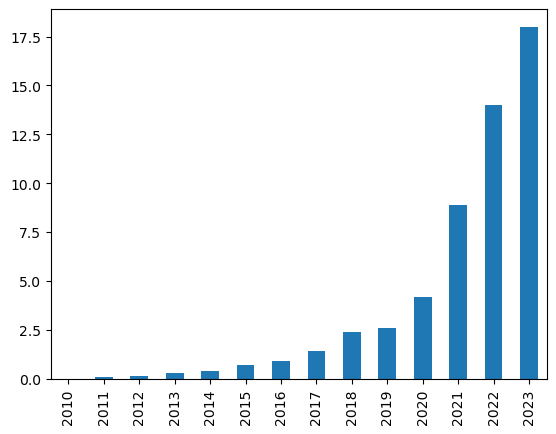

In [174]:
test_df =  create_year_region_mean_df(ev_sales_per_df)
world_sales_per_year = test_df.loc['World']
world_sales_per_year.plot(kind='bar')
plt.show()


In [151]:
ev_sales_df_year_final = create_year_region_sum_df(ev_sales_df)
ev_sales_df_year_final.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
region,,,,,,,,,,,,,,
Australia,NaN,49.0,250.0,290.0,1320.0,1760.0,1370.0,2300.0,3600.0,9200.0,6900.0,20444.0,38915.0,98006.0
Austria,NaN,NaN,NaN,650.0,1706.0,2804.0,5000.0,7102.0,9107.0,11519.0,23614.0,48014.0,47014.0,65009.0
Belgium,56.0,296.0,910.0,560.0,1950.0,3902.0,9207.0,14711.0,13213.0,17712.0,47004.0,71021.0,97020.0,193009.0
Brazil,10.0,8.0,40.0,72.0,61.0,89.0,177.0,430.0,410.0,1940.0,2600.0,13901.0,18502.0,52000.0
Bulgaria,NaN,NaN,NaN,NaN,NaN,21.0,13.0,106.0,216.0,236.0,181.0,550.0,1140.0,2160.0


In [152]:
ev_charging_fast_year_df = create_year_region_sum_df(ev_charging_fast)
ev_charging_fast_year_df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
region,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,61.0,NaN,NaN,320.0,470.0,660.0
Austria,NaN,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,1600.0,2600.0,2500.0
Belgium,NaN,NaN,NaN,47.0,55.0,77.0,110.0,220.0,240.0,360.0,480.0,790.0,1100.0,2000.0
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.9,4.9,4.9,4.9,4.9,4.9
Canada,NaN,NaN,2.0,7.0,55.0,63.0,140.0,670.0,840.0,980.0,2300.0,3100.0,3900.0,4800.0


In [153]:
ev_charging_slow_year_df = create_year_region_sum_df(ev_charging_slow)
ev_charging_slow_year_df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
region,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440.0,670.0,1700.0,2300.0,2000.0,2100.0,2100.0
Austria,NaN,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,8900.0,13000.0,15000.0
Belgium,NaN,NaN,NaN,330.0,560.0,1300.0,1500.0,1500.0,2700.0,6100.0,8000.0,12000.0,23000.0,42000.0
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,220.0,400.0,800.0,3000.0,3800.0
Canada,NaN,NaN,720.0,1200.0,2300.0,3400.0,3900.0,5200.0,7100.0,8000.0,11000.0,12000.0,17000.0,22000.0


In [154]:
ev_charging_total_year_df = create_year_region_sum_df(ev_charging_total)
ev_charging_total_year_df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
region,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.0,731.0,1700.0,2300.0,2320.0,2570.0,2760.0
Austria,NaN,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,10500.0,15600.0,17500.0
Belgium,NaN,NaN,NaN,377.0,615.0,1377.0,1610.0,1720.0,2940.0,6460.0,8480.0,12790.0,24100.0,44000.0
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.9,224.9,404.9,804.9,3004.9,3804.9
Canada,NaN,NaN,722.0,1207.0,2355.0,3463.0,4040.0,5870.0,7940.0,8980.0,13300.0,15100.0,20900.0,26800.0


In [159]:

# create initialized dataframe to hold 2010 data for easy merge of the dataframes.
# create a list to hold the rest of the years of data to store in dataframes.
years =[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
ev_sales_df_year_final = pd.DataFrame(ev_sales_df[ev_sales_df['year'] == 2010])
ev_sales_df_year_final = pd.DataFrame(ev_sales_df_year_final.groupby('region')['value'].sum())
ev_sales_df_year_final.rename(columns={'value':f"{2010}"},inplace=True)


# create data frames for every year of ev vehicle data, 2010 - 2023
for year in years:
    ev_sales_df_year = ev_sales_df[ev_sales_df['year'] == year]
    ev_sales_df_year = pd.DataFrame(ev_sales_df_year.groupby('region')['value'].sum())
    ev_sales_df_year.rename(columns={'value':f"{year}"},inplace=True)
    ev_sales_df_year_final = pd.merge(ev_sales_df_year_final,ev_sales_df_year, on='region')

ev_sales_df_year_final.head()


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
region,,,,,,,,,,,,,,
Belgium,56.0,296.0,910.0,560.0,1950.0,3902.0,9207.0,14711.0,13213.0,17712.0,47004.0,71021.0,97020.0,193009.0
Brazil,10.0,8.0,40.0,72.0,61.0,89.0,177.0,430.0,410.0,1940.0,2600.0,13901.0,18502.0,52000.0
China,1440.0,5120.0,9860.0,15730.0,73000.0,211000.0,339000.0,580000.0,1090000.0,1060000.0,1140000.0,3250019.0,5900240.0,8100520.0
EU27,1207.0,7498.0,19529.0,45042.0,57028.0,119160.0,119130.0,174270.0,250160.0,390480.0,1050660.0,1770860.0,2101200.0,2450770.0
Europe,1837.0,11448.0,28229.0,59042.0,96032.0,189190.0,213180.0,300340.0,400280.0,580610.0,1400740.0,2300960.0,2701300.0,3300820.0


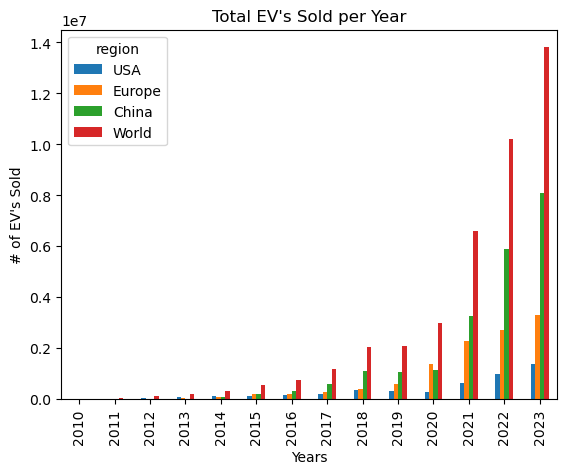

In [182]:

region_sales_year = ev_sales_df_year_final.loc[['USA','Europe','China','World']]
region_sales_year.T.plot(kind='bar',xlabel="Years",ylabel="# of EV's Sold")
plt.title("Total EV's Sold per Year")
plt.savefig("sales.png")

<Axes: >

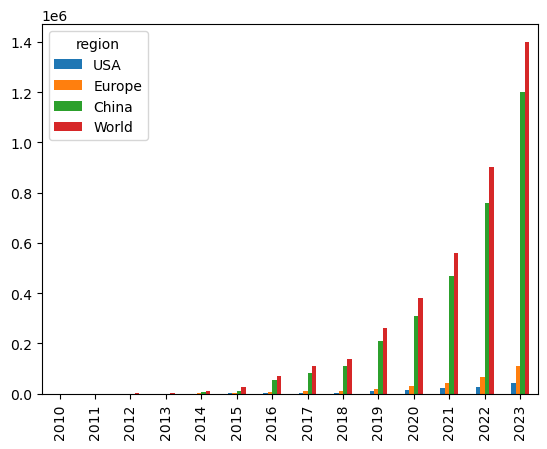

In [161]:
region_fast_chargers_year = ev_charging_fast_year_df.loc[['USA','Europe','China','World']]
region_fast_chargers_year.T.plot(kind='bar')

<Axes: >

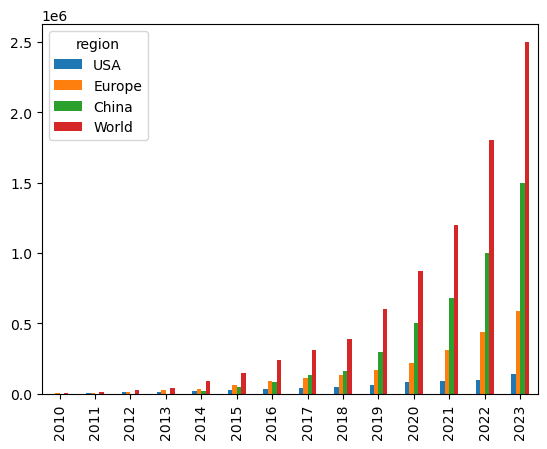

In [162]:
region_slow_chargers_year = ev_charging_slow_year_df.loc[['USA','Europe','China','World']]
region_slow_chargers_year.T.plot(kind='bar')

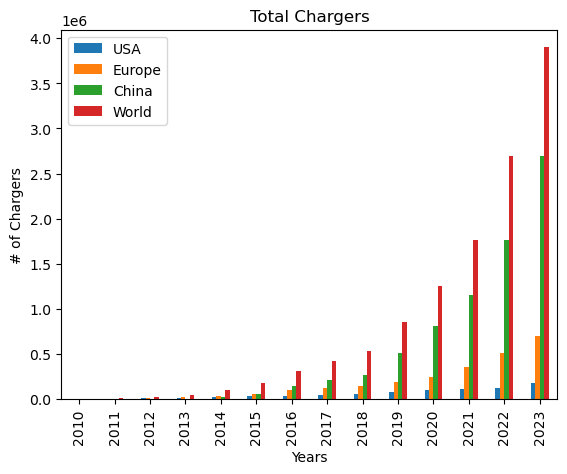

In [183]:
region_total_chargers_year = ev_charging_total_year_df.loc[['USA','Europe','China','World']]
region_total_chargers_year.T.plot(kind='bar')
plt.title('Total Chargers')
plt.xlabel('Years')
plt.ylabel('# of Chargers')
plt.legend()
plt.savefig("chargers.png")

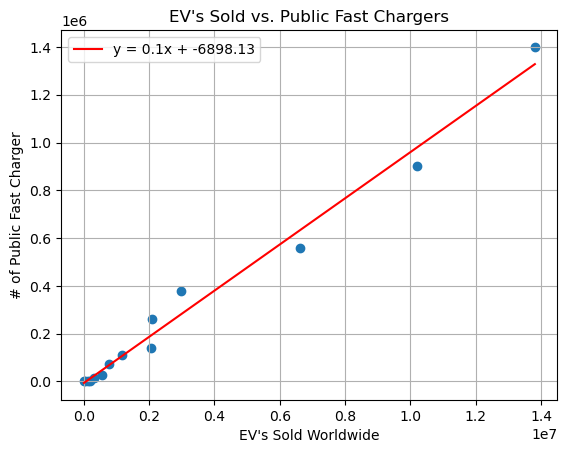

In [172]:
y = np.array(region_fast_chargers_year.loc['World'])
x = np.array(region_sales_year.loc['World'])

(slope, intercept, r_value, p_value, std_err) = st.linregress(x,y)

line_equation = slope * x + intercept
plt.scatter(x,y)
plt.ylabel("# of Public Fast Charger")
plt.xlabel("EV's Sold Worldwide")
plt.plot(x,line_equation,'r-',label = f"y = {round(slope,2)}x + {round(intercept,2)}")
plt.grid()
plt.title("EV's Sold vs. Public Fast Chargers")
plt.legend()
plt.show()


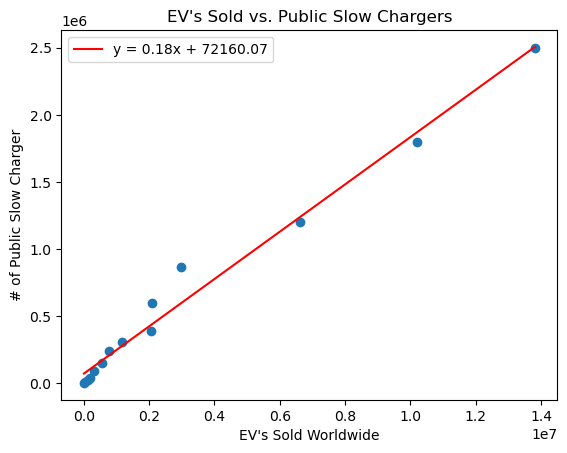

In [170]:
y = np.array(region_slow_chargers_year.loc['World'])
x = np.array(region_sales_year.loc['World'])

(slope, intercept, r_value, p_value, std_err) = st.linregress(x,y)

line_equation = slope * x + intercept
plt.scatter(x,y)
plt.ylabel("# of Public Slow Charger")
plt.xlabel("EV's Sold Worldwide")
plt.plot(x,line_equation,'r-',label = f"y = {round(slope,2)}x + {round(intercept,2)}")
plt.title("EV's Sold vs. Public Slow Chargers")
plt.legend()
plt.show()

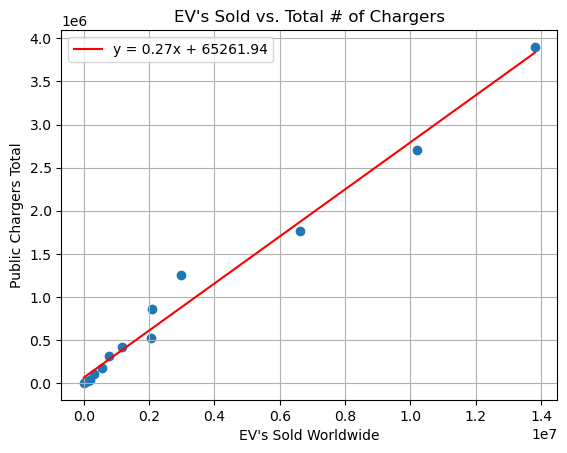

r**2 value: 0.9854201966636905
p value: 2.1804862059679017e-12
std err value: 0.009581496187417419


In [188]:
y = np.array(region_total_chargers_year.loc['World'])
x = np.array(region_sales_year.loc['World'])

(slope, intercept, r_value, p_value, std_err) = st.linregress(x,y)

line_equation = slope * x + intercept
plt.scatter(x,y)
plt.ylabel("Public Chargers Total")
plt.xlabel("EV's Sold Worldwide")
plt.plot(x,line_equation,'r-',label = f"y = {round(slope,2)}x + {round(intercept,2)}")
plt.legend()
plt.title("EV's Sold vs. Total # of Chargers")
plt.grid()
plt.savefig("lineregress.png")
plt.show()
print(f"r**2 value: {r_value**2}")
print(f"p value: {p_value}")
print(f"std err value: {std_err}")


In [167]:
p_value

2.1804862059679017e-12